In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import cv2
import os
import numpy as np
import glob
from math import ceil
from matplotlib import pyplot as plt
import matplotlib.image as plt2
from scipy.fftpack import fft

In [0]:
#projetando filtro mace a partir de um banco de dados
#projetando matrix X
#realizar a fft de cada imagem e arranjar nas colunas de uma matriz d² x N
#calcular a matriz D a partir do espectro da imagem ao quadrado(armazena numa diagonal)

In [0]:
def MACE_filter(path, d): #o parametro "d" serve para redimensionar as imagens de treinamento

    path = glob.glob(path)                     #o valor padrao para d foi de 64
    N = len(path)
    soma = np.zeros((d**2, 1))
    X_ = np.zeros((d**2,N))
    i=0
    for img in path:
        n = cv2.imread(img,0)
        if n is None:
          pass
        else:
          n = cv2.resize(n,(d,d))
          X = np.fft.fft2(n)                      #fft da imagem                                                        
          X_[:,i] = X.flatten()                      #transforma a fft em um vetor d² e armazana na coluna de uma matrix X de dimensao d²xN
          soma = soma + np.abs(X.reshape(d**2,1))**2 #soma dos espectros de potencia
          i+=1

    media = soma/N                                 #Calcula a media dos espectros
    u = np.ones((N, 1))                            #Vetor coluna de N linhas.
    D = np.diag(media.flatten())                   #D = diagonal da média do espectro de potencia
    D_inv = np.linalg.pinv(D)                      #Inversa de D 

    #Calculando o filtro a partir dos parâmetros D, X e u especificados acima
    H = np.dot(np.dot(np.dot(D_inv,X_),np.linalg.pinv(np.dot(np.conj(np.transpose(X_)),np.dot(D_inv,X_)))),u)
    H = H.reshape((d,d)) 
    #H = D1*X*((X+*Di*X)^-1)*u
    return H

In [0]:
def teste_correlacao(img, filtro, d):
                                         #lendo a imagem de teste
    half = int((d**2)/2)
    img = cv2.imread(img,0)
    img = cv2.resize(img, (d,d))
                                         #calculando corrlacao
    img_fft = np.fft.fft2(img)           #transformada da imagem de teste
    teste = img_fft * np.conj(filtro)    #multiplica a transformada da imagem pelo conjugado do filtro
    teste = np.fft.ifft2(teste)          #calcula a inversa  
    teste = np.real(teste)*d*d           #normaliza os valores
    #x = teste[half]
    #teste[half] = teste[0]
    #teste[0] = 0
    #print(teste[0])
    return teste

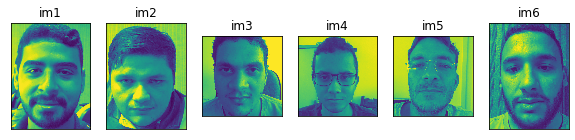

In [0]:
imagem_de_teste_1 = cv2.imread('/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/imagens-teste/1.JPG',0)
imagem_de_teste_2 = cv2.imread('/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/imagens-teste/2.JPG',0)
imagem_de_teste_3 = cv2.imread('/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/imagens-teste/3.JPG',0)
imagem_de_teste_4 = cv2.imread('/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/imagens-teste/4.JPG',0)
imagem_de_teste_5 = cv2.imread('/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/imagens-teste/5.JPG',0)
imagem_de_teste_6 = cv2.imread('/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/imagens-teste/8.jpeg',0)

plt.figure(figsize=(10,10))
plt.axis('off')

plt.subplot(161),plt.imshow(imagem_de_teste_1)
plt.title('im1'), plt.xticks([]), plt.yticks([])
plt.subplot(162),plt.imshow(imagem_de_teste_2)
plt.title('im2'), plt.xticks([]), plt.yticks([])
plt.subplot(163),plt.imshow(imagem_de_teste_3)
plt.title('im3'), plt.xticks([]), plt.yticks([])
plt.subplot(164),plt.imshow(imagem_de_teste_4)
plt.title('im4'), plt.xticks([]), plt.yticks([])
plt.subplot(165),plt.imshow(imagem_de_teste_5)
plt.title('im5'), plt.xticks([]), plt.yticks([])
plt.subplot(166),plt.imshow(imagem_de_teste_6)
plt.title('im6'), plt.xticks([]), plt.yticks([])


plt.show()

In [0]:
path1 = "/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/image_data/new_data_1/*.jpeg" #selecionando a pasta cotendo as imagens para treinamento do filtro, com imagens .jpeg
path2 = "/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/image_data/new_data_2/*.jpeg"
path3 = "/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/image_data/new_data_3/*.JPG"
path4 = "/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/image_data/new_data_4/*.JPG"
path5 = "/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/image_data/new_data_5/*.JPG"
path6 = "/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/image_data/new_data_6/*.jpeg"


In [6]:
print(len(path1))

90


In [7]:
A = MACE_filter(path1, 48)  #calcula o filtro MACE passando a pasta com as imagens de treino e dimensão de 64 pixels
B = MACE_filter(path2, 48)
C = MACE_filter(path3, 48)
D = MACE_filter(path4, 48)
E = MACE_filter(path5, 48)
F = MACE_filter(path6, 48)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


In [8]:
F.shape

(48, 48)

In [0]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/filtros/1.txt',A)
np.savetxt('/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/filtros/2.txt',B)
np.savetxt('/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/filtros/3.txt',C)
np.savetxt('/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/filtros/4.txt',D)
np.savetxt('/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/filtros/5.txt',E)
np.savetxt('/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/filtros/6.txt',F)

In [0]:
filtro_mace = np.loadtxt('/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/filtros/1.txt')
#filtro_mace = filtro_mace.reshape(4096,1)

In [0]:
B = teste_correlacao('/content/drive/My Drive/Colab Notebooks/Reconhecimento_facial/imagens-teste/1.JPG', filtro_mace, 48) #Teste de correlacao usando a imagem de teste 1

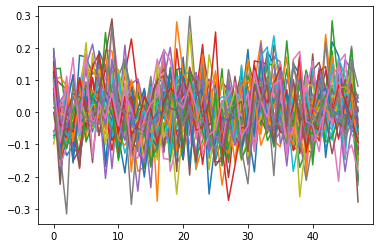

In [13]:
#B.shape
plt.plot((B))                         #plot do grafico de correlacao 2D (opcional 3D)
plt.show()                            # O teste deu positivo para a imagem de especificada

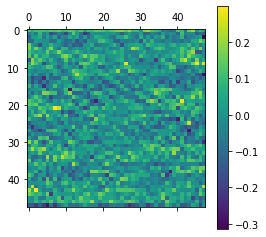

In [14]:
plt.matshow(B)
plt.colorbar()
plt.show()